# Toxic Mushroom Classification

First we start off by importing all the necessary libraries to analyze our Kaggle mushroom dataset. This includes the `toadstool` package, which will allow us to easily utilize multiple classification algorithms as well as visualize certain performance metrics.

In [1]:
import pandas as pd

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from toadstool.learn import *

We can then import our mushroom dataset and instantiate what classification models we want to apply. In this case, we're going to use *Random Forest*, *Decision Tree*, *Logistic Regression*, and *Gaussian Naive Bayes*. This we can compare and experiment with each learning model.

In [2]:
data_csv = pd.read_csv('data/mushrooms.csv')

models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB()
}

We can now instantiate a `MultiClassifier` instance and pass in our dataset and models. The dataset must first be preprocessed properly before we can effectively train our models. `MultiClassifier.preprocess` will not only convert all features to integers, but also abstract the dataset splitting into training and testing data from us.

In [3]:
classifier = MultiClassifier(data_csv, models)

classifier.preprocess()

Now we can train our models. `MultiClassifier.train_all` will allow us to train each model on the dataset.

In [4]:
classifier.train_all()

Now that each model is trained, we can test each model on our testing data. *Random Forest* and *Decision Tree* achieve accuracies of 100%, whereas *Logistic Regression* and *Gaussian Naive Bayes* achieve lower scores of 94.9% and 92.1% respectively.

In [5]:
classifier.test_all()
classifier.accuracies

[1.0, 1.0, 0.94830132939438705, 0.91875923190546527]

We also want to calculate the performance of each model when training on the dataset. We can utilize `performance_all` to visualize each model's performance.

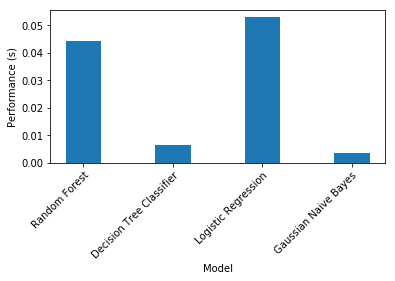

In [6]:
performance_all(classifier.performances, classifier.names)

This tells us some important information about the accuracy and performance of each model, but we also want to focus on the dataset and see which features were most important. We can use `feature_importances` and the *Random Forest* model to visualize the importance of each feature during the decision making process.

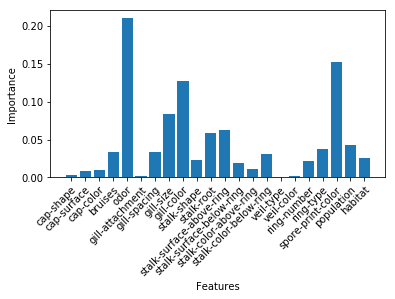

In [7]:
importances = classifier.models['Random Forest'].feature_importances_
feature_columns = classifier.processed['train_X'].columns

feature_importances(importances, feature_columns)

Lastly, we might also be interested in seeing how the training data percentage affects the overall accuracy of each model. We can use `train_percent_accuracy` to graph how each model's accuracy fluctuates as the training percentage changes.

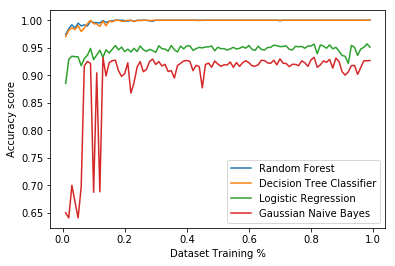

In [8]:
train_percent_accuracy(classifier)